In [1]:
import ROOT
import math
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.12/06


- run008 for the noise, run020 for the injected signal
- run008: use h_8_2_0_4
- run020: use h_20_7_0_4

In [2]:
f = ROOT.TFile('/Users/yuntse/Data/icarus/data/vst/output_waveforms_run020.root')
h = f.Get('view/h_20_7_0_4')

In [3]:
wf = h.ProjectionY('Channel9',10,10)

In [4]:
c = ROOT.TCanvas('Board4Ch9', 'Board4Ch9', 2000, 1200)

Info in <TCanvas::Print>: png file PulseWaveform.png has been created


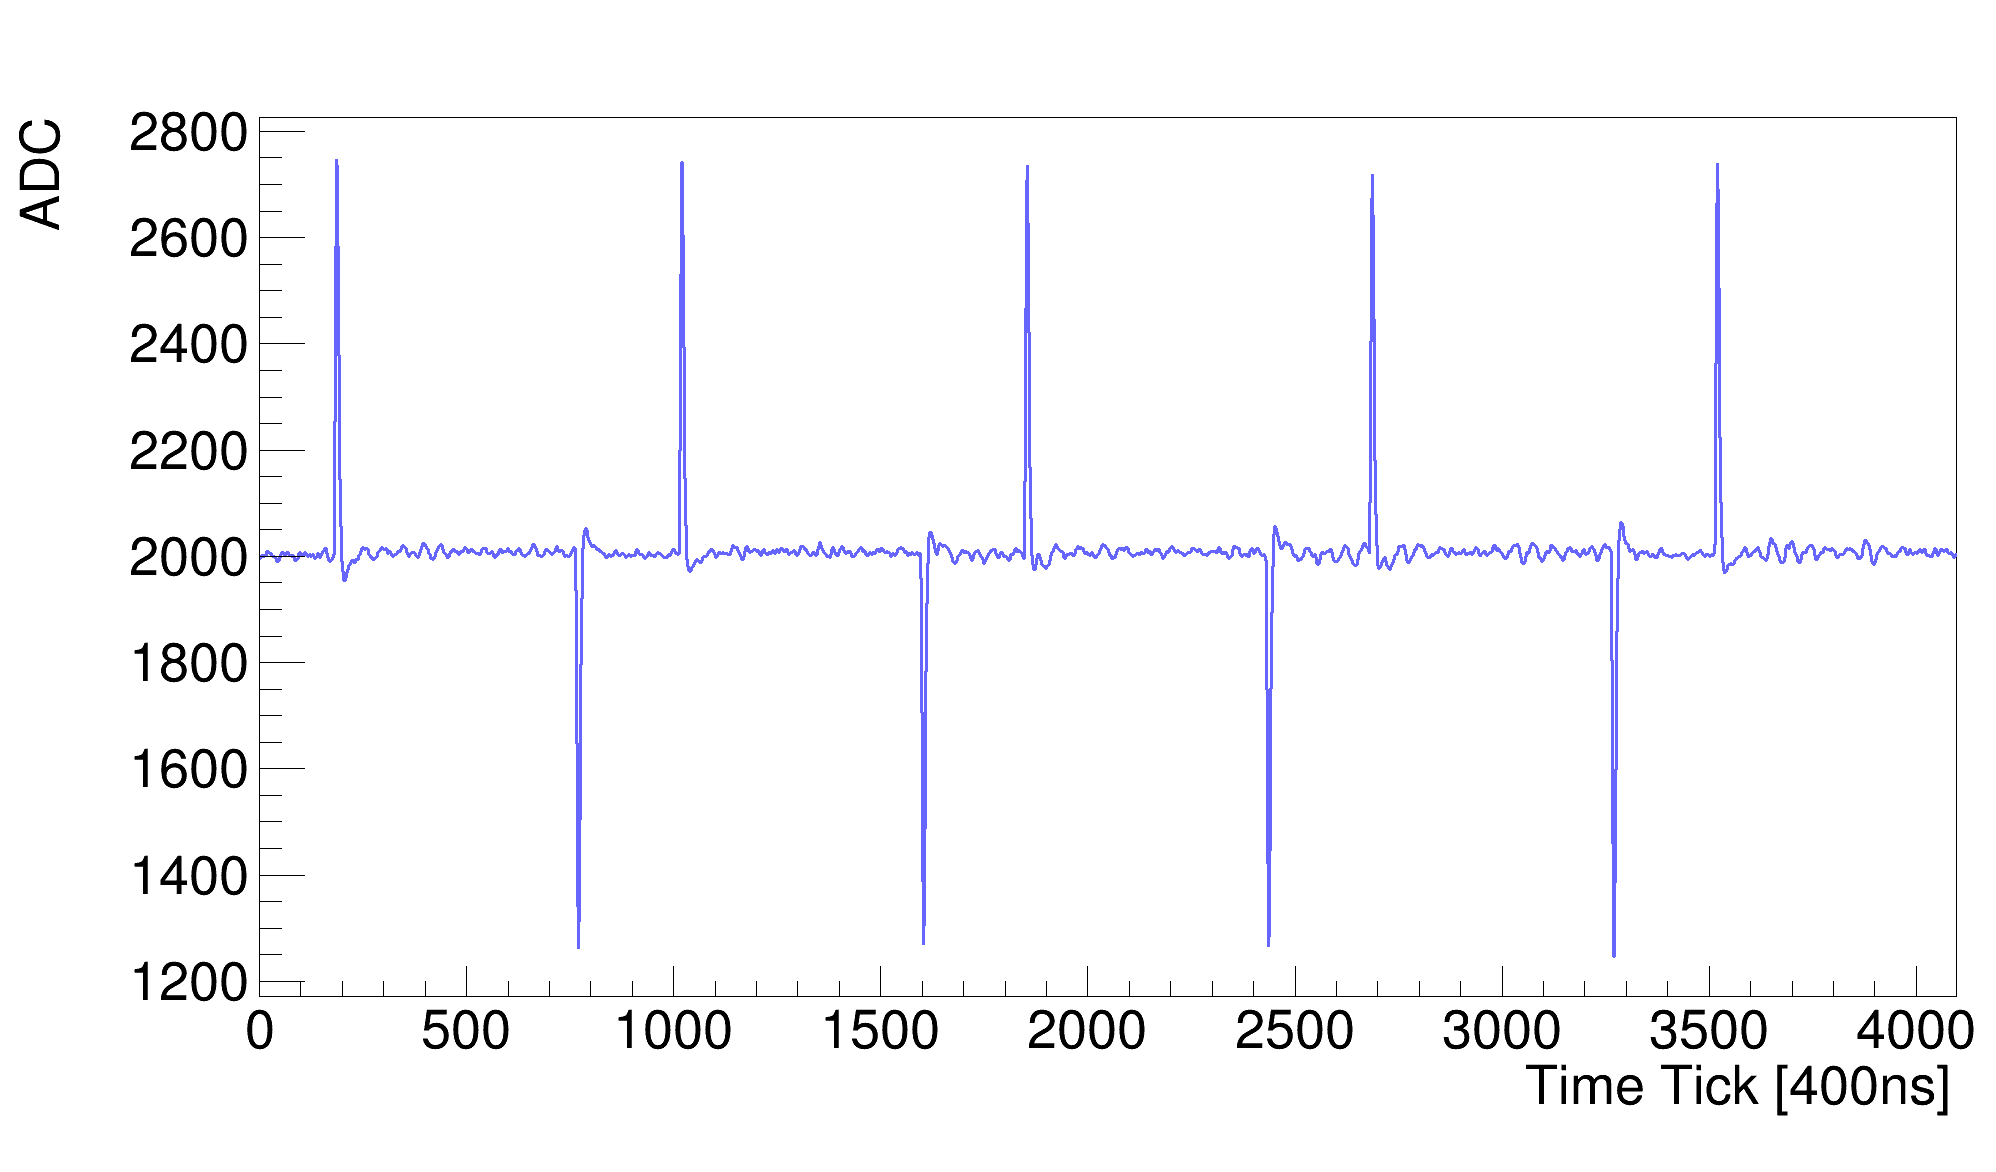

In [5]:
c.SetBottomMargin(0.15)
c.SetLeftMargin(0.13)
c.SetRightMargin(0.02)
wf.SetTitle('')
wf.GetXaxis().SetTitle('Time Tick [400ns]')
wf.GetXaxis().SetTitleSize(0.05)
wf.GetXaxis().SetLabelSize(0.05)
wf.GetYaxis().SetTitle('ADC')
wf.GetYaxis().SetTitleSize(0.05)
wf.GetYaxis().SetLabelSize(0.05)
wf.SetLineColor(593)
wf.SetLineWidth(3)
wf.Draw()
c.Draw()
c.SaveAs('PulseWaveform.png')

In [6]:
x = []
y = []
for i in xrange( 1, wf.GetNbinsX()+1 ):
    x.append( i )
    y.append( wf.GetBinContent(i) )

In [7]:
margin = int( 0.25*len(y) )
v = 0.
v2 = 0.
for yi in sorted(y)[margin:-margin]:
    v += yi
v /= float( 0.5*len(y) )
print 'baseline: %f' % v

for yi in sorted(y)[margin:-margin]:
    yi -= v
    v2 += yi*yi
v2 /= float( 0.5*len(y) )
rms = math.sqrt( max( v2, 0. ) )
print 'rms:      %f' % rms

baseline: 2006.533203
rms:      3.129664


In [8]:
peak = 0.
maxPos = 0
for i, yi in enumerate(y):
    amp = yi - v
    if amp > peak:
        peak = amp
        maxPos = i
print 'peak:    %f at tick %d' % ( peak, maxPos ) 

peak:    741.466797 at tick 186


In [9]:
from numpy import fft
import numpy
import math
from matplotlib import pyplot

In [10]:
n = wf.GetNbinsX()
T = 0.4e-6*n
data = numpy.empty([0,1], float)
for i in xrange( 1, n+1 ):
    data = numpy.append( data, wf.GetBinContent(i)-v)

In [11]:
round5 = lambda v: round(v, 5)
round5array = lambda a: numpy.array(list(map(round5, a)))

In [12]:
data

array([-10.53320312, -10.53320312, -10.53320312, ...,  -7.53320312,
        -5.53320312,  -3.53320312])

In [13]:
data_ft = numpy.fft.rfft(data[:-1])
round5array(data_ft)

/Users/yuntse/Source/products/larsoft/python/v2_7_14b/Darwin64bit+16/lib/python2.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


array([ 5.16453320e+03,  5.35183027e+03,  5.38517188e+03, ...,
        1.20360800e+01, -8.99770000e-01, -2.97719900e+01])

In [14]:
coeff = abs(data_ft) / (float(n) / 2)
round5array(coeff)

array([2.52174, 2.61375, 2.66856, ..., 0.01101, 0.01013, 0.01463])

In [15]:
round5array(coeff)

array([2.52174, 2.61375, 2.66856, ..., 0.01101, 0.01013, 0.01463])

In [16]:
freq = numpy.fft.rfftfreq(len(data[:-1])) * (n / T)
freq

array([0.00000000e+00, 6.10500611e+02, 1.22100122e+03, ...,
       1.24847375e+06, 1.24908425e+06, 1.24969475e+06])

In [17]:
zip(freq, coeff)

[(0.0, 2.521744728088379),
 (610.5006105006105, 2.613751084201782),
 (1221.001221001221, 2.6685640725147266),
 (1831.5018315018315, 2.9971283704657403),
 (2442.002442002442, 3.906703791668114),
 (3052.5030525030525, 18.65912003775817),
 (3663.003663003663, 1.608423031344926),
 (4273.504273504273, 2.596560829099341),
 (4884.004884004884, 3.554638850467858),
 (5494.505494505494, 6.38345043686813),
 (6105.006105006105, 21.72756105405609),
 (6715.506715506715, 1.7527466982939715),
 (7326.007326007326, 0.22738038980835662),
 (7936.507936507936, 1.1205176128767018),
 (8547.008547008547, 2.349854169541446),
 (9157.509157509157, 7.979542775288048),
 (9768.009768009768, 3.1340888887993854),
 (10378.510378510378, 2.9883713303501094),
 (10989.010989010989, 4.183530820055838),
 (11599.5115995116, 8.335846282167061),
 (12210.01221001221, 11.608530230747494),
 (12820.51282051282, 2.638270358262636),
 (13431.01343101343, 3.367102883805205),
 (14041.514041514041, 5.885656986374201),
 (14652.0146520146

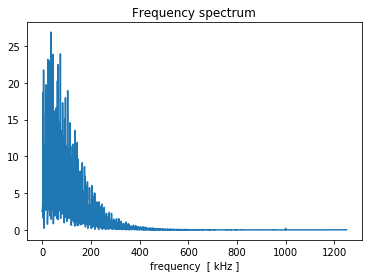

In [20]:
fig = pyplot.figure(clear=True)
pyplot.plot(freq/1000, coeff, figure=fig, drawstyle="steps")
pyplot.title("Frequency spectrum")
pyplot.xlabel("frequency  [ kHz ]")
pyplot.show()
fig.savefig("run020_Board4Ch9.pdf")

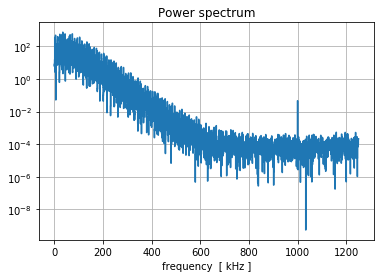

In [21]:
fig = pyplot.figure(clear=True)
pyplot.plot(freq/1000, coeff**2, figure=fig, drawstyle="steps")
pyplot.title("Power spectrum")
pyplot.xlabel("frequency  [ kHz ]")
pyplot.yscale('log')
pyplot.grid(True)
pyplot.show()
fig.savefig("PowerSpectrum_run020_Board4Ch9.pdf")